# WORLD HAPPINESS INDEX REPORT

In this notebook we will be analysing the World Happiness data from the year 2021 and then will also analyse the data over the years from 2017 to 2021 for a select few regions or countries. This data is from a survey conducted by [Gallup World Poll (GWP)](https://www.gallup.com/analytics/318875/global-research.aspx) <br>
The rankings of world happiness are based on a Cantril ladder survey. Survey respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the life evaluation results with various life factors. This is also called the __Ladder Score__. <br>
The Happiness Score for a country is calculated on the following six parameters: <br>
1. __GDP per capita:__ GDP per capita is a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic prduct by its total population.
2. __Social Support:__ Support accessible to an individual through social ties to other individuals, groups, and the larger community. 
3. __Healthy Life Expectancy:__ Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
4. __Freedom to make Life Choices:__ Freedom to make life choices is the national average of binary responses to the GWP question _“Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”_
5. __Generosity:__ Generosity is the residual of regressing the national average of GWP responses to the question _“Have you donated money to a charity in the past month?”_ on GDP per capita.
6. __Preception of Corruption:__ Perceptions of corruption are the average of binary answers to two GWP questions: _“Is corruption widespread throughout the government or not?”_ and _“Is corruption widespread within businesses or not?”_ Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.<br>

Each country is also compared against a hypothetical nation called __Dystopia__. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia. <br>
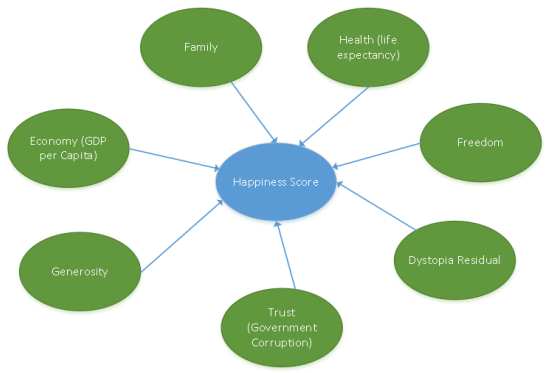
World Happiness Report official website: https://worldhappiness.report/  

Image Credits:[here](https://digitalcommons.iwu.edu/cgi/viewcontent.cgi?article=1492&context=uer)

## Adding Packages

* NumPy is one of the most commonly used packages for scientific computing in Python
* Pandas package is a high-level data manipulation tool built on top of the NumPy package in Python
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
* Seaborn is used for data visualization and exploratory data analysis and is built on top of Matplotlib in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Adding Data

We will be adding two datasets-
* 'world-happiness-report-2021.csv'   
* 'world-happiness-report.csv'  

These datasets can be found [here](http://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021)

In [2]:
worldHappiness2021_df = pd.read_csv("world-happiness-report-2021.csv")
worldHappiness_df = pd.read_csv("world-happiness-report.csv")

## Viewing Data

Now that we have added the data, let us view the initial few entries:

### For Dataset 1

In [3]:
worldHappiness2021_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


From the table above, we can see there are 20 columns, out of which a few are not of any use to us <br>
To fix this, we will create a new table consisting of columns specified by us

### For Dataset 2

In [4]:
worldHappiness_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


We can see that this table cotains data of world happiness over the years, also there are two extra columns that we will not be needing, that is Positive affect and Negative affect

## Preparing Data

### For Dataset 1

We will select the columns we require by stating their names and save it in a list named 'columns' <br>
Using these columns, we will create a new dataframe using the .copy() method

In [5]:
columns = ["Country name",
           "Regional indicator",
           "Ladder score",
           "Logged GDP per capita",
           "Social support",
           "Healthy life expectancy",
           "Freedom to make life choices",
           "Generosity",
           "Perceptions of corruption",
           "Dystopia + residual"]

In [6]:
data = worldHappiness2021_df[columns].copy()

In [7]:
columns

['Country name',
 'Regional indicator',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Dystopia + residual']

 We can now also rename the column names, using the .rename() function, and store it as a new dataframe. We will also change the starting Index from zero to one (0 to 1)

In [8]:
worldHappiness2021 = data.rename({"Country name":"Country",
                                  "Regional indicator":"Region",
                                  "Ladder score":"Ladder_Score",
                                  "Logged GDP per capita":"GDP_per_capita",
                                  "Social support":"Social_Support",
                                  "Healthy life expectancy":"Healthy_Life_Expectancy",
                                  "Freedom to make life choices":"Freedom_of_Choice",
                                  "Generosity":"Generosity",
                                  "Perceptions of corruption":"Perceptions_to_Corruption",
                                  "Dystopia + residual":"Dystopia_Residual"},
                                 axis=1)

In [9]:
worldHappiness2021.index = worldHappiness2021.index + 1

In [10]:
worldHappiness2021.head()

,Country,Region,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption,Dystopia_Residual
1,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
2,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
3,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
4,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
5,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798


In [11]:
worldHappiness2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 1 to 149
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    149 non-null    object 
 1   Region                     149 non-null    object 
 2   Ladder_Score               149 non-null    float64
 3   GDP_per_capita             149 non-null    float64
 4   Social_Support             149 non-null    float64
 5   Healthy_Life_Expectancy    149 non-null    float64
 6   Freedom_of_Choice          149 non-null    float64
 7   Generosity                 149 non-null    float64
 8   Perceptions_to_Corruption  149 non-null    float64
 9   Dystopia_Residual          149 non-null    float64
dtypes: float64(8), object(2)
memory usage: 11.8+ KB


This shows us that there are no null values within the dataset, in which there are a total of 149 records

In [12]:
worldHappiness2021.describe()

,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption,Dystopia_Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000


In [13]:
worldHappiness2021.shape

(149, 10)

### For Dataset 2

We will select the columns we require by stating their names and save it in a list named 'columns2'
Using these columns, we will create a new dataframe using the .copy() method

In [14]:
columns2 = ["Country name",
           "year",
           "Life Ladder",
           "Log GDP per capita",
           "Social support",
           "Healthy life expectancy at birth",
           "Freedom to make life choices",
           "Generosity",
           "Perceptions of corruption"]

In [15]:
data2 = worldHappiness_df[columns2].copy()

We can now also rename the column names, using the .rename() function, and store it as a new dataframe. We will also change the starting Index from zero to one (0 to 1)

In [16]:
worldHappiness = data2.rename({"Country name":"Country",
                               "year":"Year",
                               "Life Ladder":"Ladder_Score",
                               "Log GDP per capita":"GDP_per_capita",
                               "Social support":"Social_Support",
                               "Healthy life expectancy at birth":"Healthy_Life_Expectancy",
                               "Freedom to make life choices":"Freedom_of_Choice",
                               "Generosity":"Generosity",
                               "Perceptions of corruption":"Perceptions_to_Corruption"},
                               axis=1)

Now we will create a new table with the world happiness index for the countries over the past 5 years. We will achieve this by dropping the values before the year 2017

In [17]:
worldHappiness5years = worldHappiness.drop(worldHappiness[worldHappiness['Year'] <= 2015].index, inplace=False)
worldHappiness5years.head()

,Country,Year,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption
8,Afghanistan,2016,4.220,7.697,0.559,53.0,0.523,0.042,0.793
9,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954
10,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
20,Albania,2016,4.511,9.437,0.638,68.1,0.730,-0.017,0.901


We can see that the index values are not starting from 1, so let's fix this now by using the .reset_index() method

In [18]:
worldHappiness5years.reset_index(drop=True, inplace=True)
worldHappiness5years.index = worldHappiness5years.index + 1
worldHappiness5years.head()

,Country,Year,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption
1,Afghanistan,2016,4.220,7.697,0.559,53.0,0.523,0.042,0.793
2,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954
3,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
4,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
5,Albania,2016,4.511,9.437,0.638,68.1,0.730,-0.017,0.901


We should now clean the data by dropping all the NULL values

In [19]:
worldHappiness5years.dropna(inplace=True)

In [20]:
worldHappiness5years.shape

(589, 9)

In [21]:
worldHappiness5years.describe()

,Year,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,2017.843803,5.546871,9.432944,0.814221,64.740873,0.786112,-0.010725,0.730095
std,1.344951,1.119563,1.150764,0.122125,7.028244,0.119100,0.154973,0.189205
min,2016.000000,2.375000,6.635000,0.290000,44.900000,0.304000,-0.335000,0.047000
25%,2017.000000,4.737000,8.526000,0.740000,59.200000,0.715000,-0.121000,0.680000
50%,2018.000000,5.563000,9.569000,0.842000,66.400000,0.808000,-0.034000,0.793000
75%,2019.000000,6.281000,10.376000,0.913000,69.800000,0.881000,0.079000,0.856000
max,2020.000000,7.889000,11.648000,0.985000,77.100000,0.985000,0.679000,0.969000


In [22]:
worldHappiness5years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 1 to 670
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    589 non-null    object 
 1   Year                       589 non-null    int64  
 2   Ladder_Score               589 non-null    float64
 3   GDP_per_capita             589 non-null    float64
 4   Social_Support             589 non-null    float64
 5   Healthy_Life_Expectancy    589 non-null    float64
 6   Freedom_of_Choice          589 non-null    float64
 7   Generosity                 589 non-null    float64
 8   Perceptions_to_Corruption  589 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 46.0+ KB


This shows us that there are no null values within the dataset, in which there are a total of 465 records <br>

## Analysing Data

### For Dataset 1

Let us now analyse the data by grouping the data and sorting the data based on regions, but first let us see how many regions has the data been divided over

In [23]:
print('Number of Unique values in Regional Indicator are : ', len(worldHappiness2021['Region'].unique()))

Number of Unique values in Regional Indicator are :  10


In [24]:
print('Unique values in Regional Indicator are : ', worldHappiness2021['Region'].unique().tolist())

Unique values in Regional Indicator are :  ['Western Europe', 'North America and ANZ', 'Middle East and North Africa', 'Latin America and Caribbean', 'Central and Eastern Europe', 'East Asia', 'Southeast Asia', 'Commonwealth of Independent States', 'Sub-Saharan Africa', 'South Asia']


Now, Let us change merge these 10 regions into the 5 sub-regions/ continents. We will be grouping Australia and NewZealand with the United States of America and Canada

In [25]:
Continents= {
    "Sub-Saharan Africa":"Africa",
    "Western Europe":"Europe",
    "Latin America and Caribbean":"South America",
    "Middle East and North Africa":"Africa",
    "Central and Eastern Europe":"Europe",
    "Commonwealth of Independent States":"Asia",
    "Southeast Asia":"Asia",
    "South Asia":"Asia",
    "East Asia":"Asia",
    "North America and ANZ":"North America"
    }    
worldHappiness2021['Region'] = worldHappiness2021['Region'].replace(Continents)
worldHappiness2021.head()

,Country,Region,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption,Dystopia_Residual
1,Finland,Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
2,Denmark,Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
3,Switzerland,Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
4,Iceland,Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
5,Netherlands,Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798


Now let us take a look at the number of unique regions again

In [26]:
print('Number of Unique values in Regional Indicator are : ', len(worldHappiness2021['Region'].unique()))

Number of Unique values in Regional Indicator are :  5


In [27]:
print('Unique values in Regional Indicator are : ', worldHappiness2021['Region'].unique().tolist())

Unique values in Regional Indicator are :  ['Europe', 'North America', 'Africa', 'South America', 'Asia']


In [28]:
regionCount = worldHappiness2021.groupby(['Region']).count()['Country'].sort_values(ascending=False)
regionCount

Region
Africa           53
Europe           38
Asia             34
South America    20
North America     4
Name: Country, dtype: int64

The table above shows us the number of countries in each region

In [29]:
GDPbyRegion=worldHappiness2021.groupby(['Region'])["GDP_per_capita"].sum().sort_values(ascending=False)
GDPbyRegion

Region
Africa           455.031
Europe           399.131
Asia             320.599
South America    187.400
North America     43.238
Name: GDP_per_capita, dtype: float64

The table above shows us the GDP per capita for every Region, and let us now also declare a variable TopAndBottomFive to analyse the happiest 5 countries and the unhappiest 5 countries

In [30]:
TopAndBottomFive = worldHappiness2021.iloc[np.r_[0:5,-5:0]]
TopAndBottomFive

,Country,Region,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption,Dystopia_Residual
1,Finland,Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,3.253
2,Denmark,Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2.868
3,Switzerland,Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2.839
4,Iceland,Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2.967
5,Netherlands,Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2.798
145,Lesotho,Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,1.800
146,Botswana,Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,0.648
147,Rwanda,Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,1.095
148,Zimbabwe,Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,1.205
149,Afghanistan,Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,1.895


### For Dataset 2

We can analyse data for the countries between 2016 to 2020

In [31]:
world = worldHappiness5years.sort_values(by='Ladder_Score', ascending=False)
world.reset_index(drop=True, inplace=True)
world.index = world.index + 1
world.head()

,Country,Year,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption
1,Finland,2020,7.889,10.750,0.962,72.1,0.962,-0.116,0.164
2,Finland,2018,7.858,10.783,0.962,71.9,0.938,-0.127,0.199
3,Finland,2017,7.788,10.768,0.964,71.8,0.962,-0.002,0.192
4,Finland,2019,7.780,10.792,0.937,72.0,0.948,-0.052,0.195
5,Switzerland,2019,7.694,11.136,0.949,74.4,0.913,0.036,0.294


Creating a database with the data for the five happiest countries from 2016 to 2020

In [32]:
worlds = world.groupby('Country')
happy = pd.concat([group for (name, group) in worlds if name in ['Finland','Denmark','Switzerland','Iceland','Netherlands']])
happy = happy.sort_values(by='Ladder_Score', ascending=False)
happy.reset_index(drop=True, inplace=True)
happy.index = happy.index + 1
happy

,Country,Year,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption
1,Finland,2020,7.889,10.750,0.962,72.1,0.962,-0.116,0.164
2,Finland,2018,7.858,10.783,0.962,71.9,0.938,-0.127,0.199
3,Finland,2017,7.788,10.768,0.964,71.8,0.962,-0.002,0.192
4,Finland,2019,7.780,10.792,0.937,72.0,0.948,-0.052,0.195
5,Switzerland,2019,7.694,11.136,0.949,74.4,0.913,0.036,0.294
6,Denmark,2019,7.693,10.954,0.958,72.7,0.963,0.020,0.174
7,Finland,2016,7.660,10.740,0.954,71.7,0.948,-0.027,0.250
8,Denmark,2018,7.649,10.935,0.958,72.4,0.935,0.018,0.151
9,Denmark,2017,7.594,10.916,0.952,72.1,0.955,0.155,0.181
10,Iceland,2020,7.575,10.824,0.983,73.0,0.949,0.160,0.644


Creating a database with the data for the five unhappiest countries from 2016 to 2020

In [33]:
worlds = world.groupby('Country')
unhappy = pd.concat([group for (name, group) in worlds if name in ['Lesotho','Botswana','Rwanda','Zimbabwe','Afghanistan']])
unhappy = unhappy.sort_values(by='Ladder_Score', ascending=True)
unhappy.reset_index(drop=True, inplace=True)
unhappy.index = unhappy.index + 1
unhappy

,Country,Year,Ladder_Score,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions_to_Corruption
1,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
2,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954
3,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831
4,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
5,Rwanda,2017,3.108,7.588,0.517,60.5,0.908,0.051,0.214
6,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789
7,Rwanda,2019,3.268,7.708,0.489,61.7,0.869,0.064,0.168
8,Rwanda,2016,3.333,7.576,0.665,59.9,0.911,0.025,0.159
9,Botswana,2018,3.461,9.778,0.795,58.9,0.818,-0.254,0.807
10,Botswana,2019,3.471,9.785,0.774,59.6,0.833,-0.239,0.792


Now, it is time to visualize the data

## Visualizing Data

### For Dataset 1

We will start by making a Seaborn Heatmap to interpret the relationship between the features like Ladder Score, GDP per capita, Social Support, Healthy Life Expectancy, Freedom to make Life Decisions, Generosity, Perceptions to Corruption and Dystopia Residual

In [34]:
data_corr = worldHappiness2021.corr()

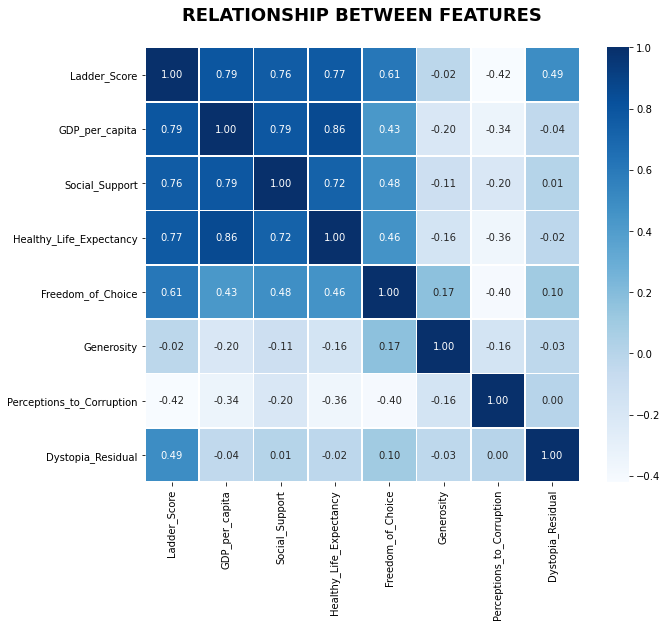

In [35]:
#Using Seaborn Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data_corr, fmt=".2f" ,annot=True, linewidth=0.7, cmap="Blues", square=True)
plt.title('RELATIONSHIP BETWEEN FEATURES\n', weight='bold').set_fontsize('18')
plt.show()
#plt.savefig('heatmap_relation_between_features.png') 

Lets view a plot between the regions and the ladder score

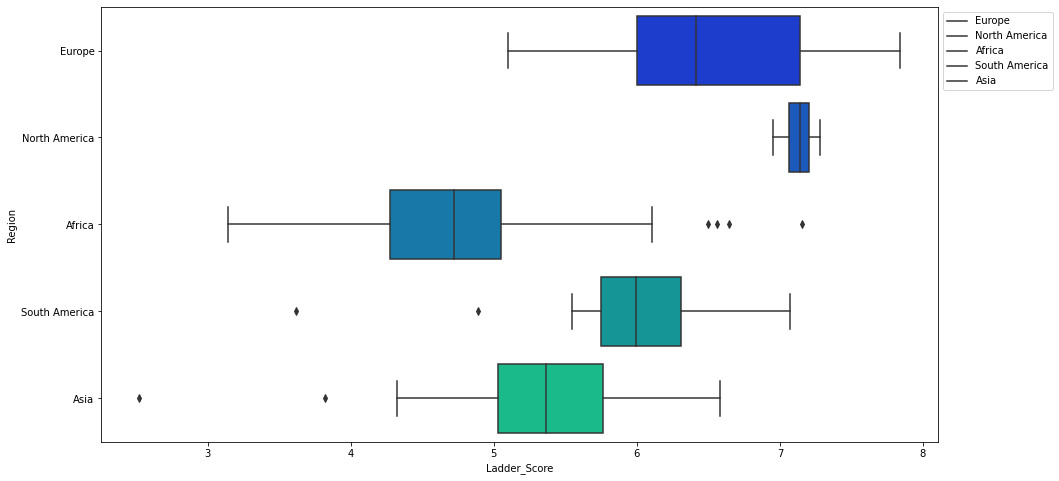

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Ladder_Score", y="Region", data=worldHappiness2021, palette='winter')
plt.legend(labels=["Europe","North America","Africa","South America","Asia"], loc = 2, bbox_to_anchor = (1,1))
#plt.savefig('Regions_vs_LadderScore.png') 

Africa, South America and Asia all have more than one outlier <br>
The box plot for North America is very different, one reason could be there are lesser number of countries in this data <br>
For Africa, the longer left tale shows the data is more spread there. Asia and South America on the other hand, show a longer right tail <br>



The following is a Seaborn barplot, representing GDP_per_capita and the Laddder Score by region

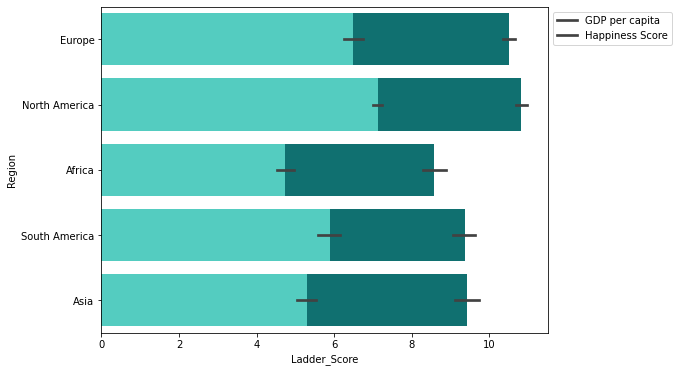

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP_per_capita", y="Region", data=worldHappiness2021, color="teal")
sns.barplot(x="Ladder_Score", y="Region", data=worldHappiness2021, color="turquoise")
plt.legend(labels=["GDP per capita","Happiness Score"], loc = 2, bbox_to_anchor = (1,1))
#plt.savefig('GDPandHappinessScore_vs_Region.png') 

Let's analyse the GDP by Region using Matplotlib.pyplot to plot a pie chart of the GDP per capita for each of the 5 regions

Text(0, 0.5, '')

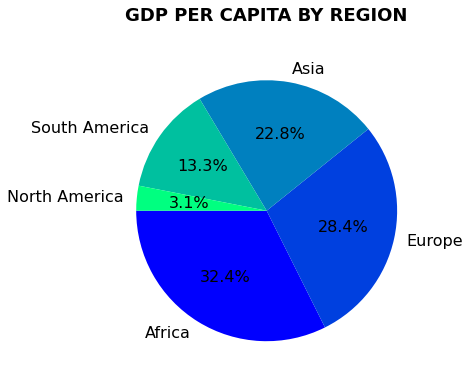

In [38]:
#Using Matplotlib.pyplot
plt.figure(figsize=(8,6))
GDPbyRegion.plot.pie(autopct="%1.1f%%", cmap="winter",
                     startangle=180, textprops = {'color': 'black','fontsize':16})
plt.title('GDP PER CAPITA BY REGION\n', weight='bold').set_fontsize('18')
plt.ylabel("")
#plt.savefig('GDP_per_capita_by_region.png') 

Now, we can visualize the World's happiest countries by region. So we will make 5 different bar plots using Matplotlib.pyplot <br>

In [39]:
Africa = worldHappiness2021[worldHappiness2021["Region"]=="Africa"]
Europe = worldHappiness2021[worldHappiness2021["Region"]=="Europe"]
Asia = worldHappiness2021[worldHappiness2021["Region"]=="Asia"]
South_America = worldHappiness2021[worldHappiness2021["Region"]=="South America"]
North_America = worldHappiness2021[worldHappiness2021["Region"]=="North America"]

Asia:

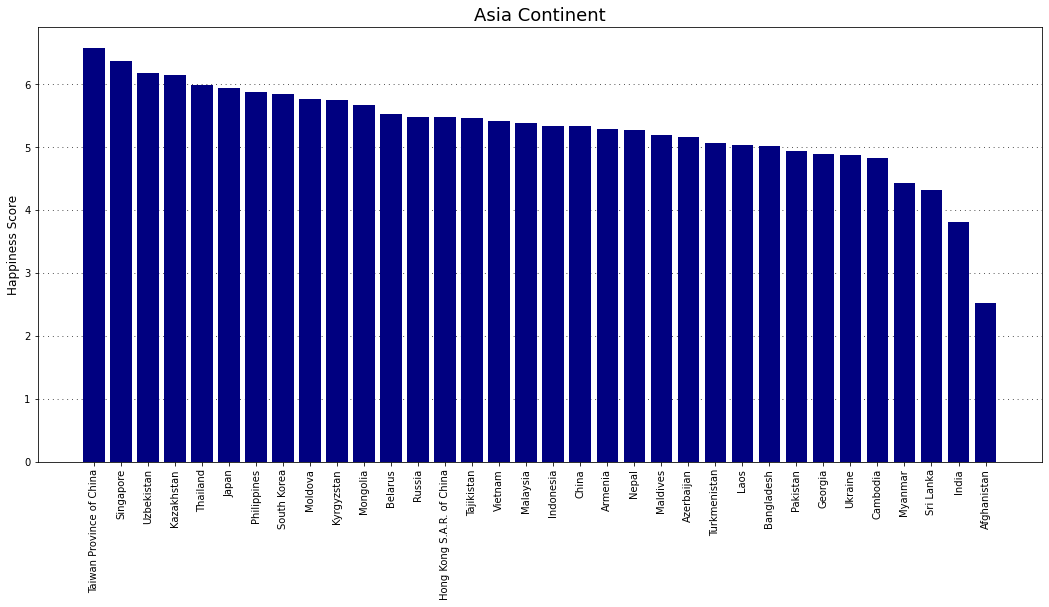

In [40]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.grid(color='black', linestyle='--', axis='y',dashes=(1,5))
plt.bar(Asia["Country"], Asia['Ladder_Score'], color='navy', zorder=3)
plt.ylabel("Happiness Score").set_fontsize('12')
plt.title("Asia Continent").set_fontsize('18')
#plt.savefig('Asia_continent.png') 

Africa:

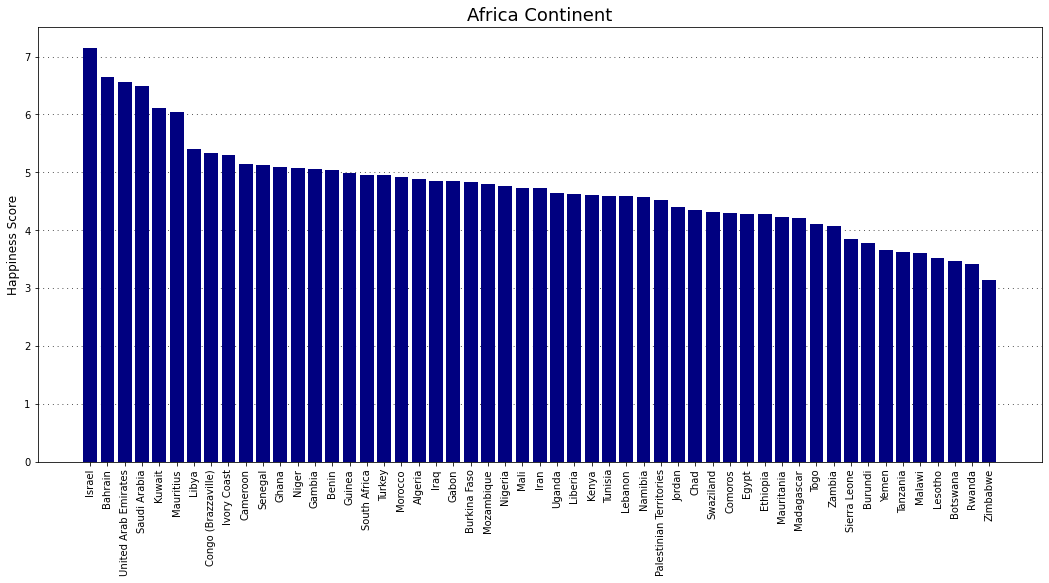

In [41]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.grid(color='black', linestyle='--', axis='y',dashes=(1,5))
plt.bar(Africa["Country"], Africa['Ladder_Score'], color='navy', zorder=3)
plt.ylabel("Happiness Score").set_fontsize('12')
plt.title("Africa Continent").set_fontsize('18')
#plt.savefig('Africa_continent.png') 

Europe:

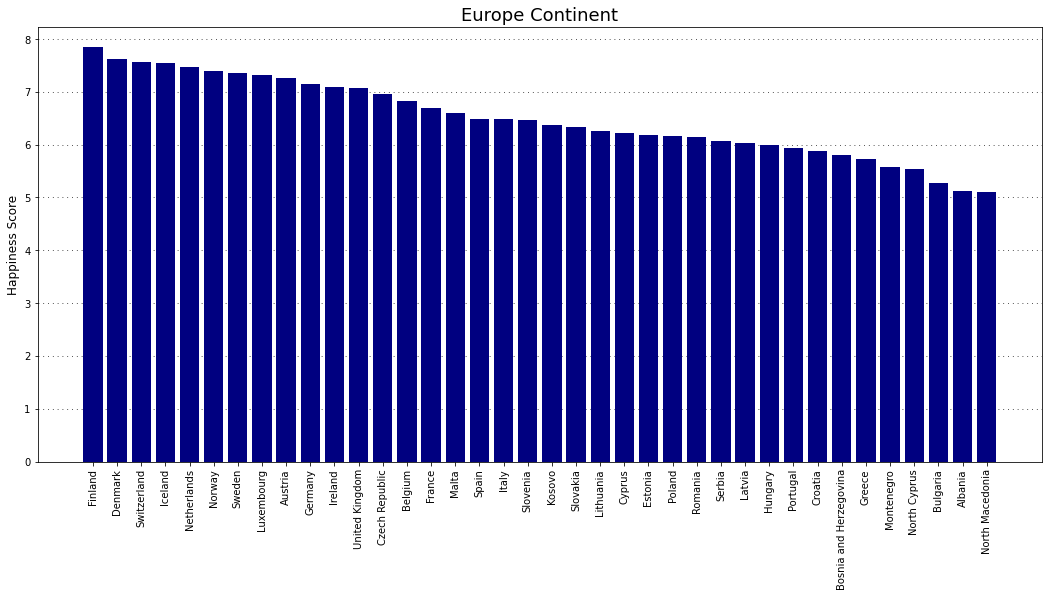

In [42]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.grid(color='black', linestyle='--', axis='y',dashes=(1,5))
plt.bar(Europe["Country"], Europe['Ladder_Score'], color='navy', zorder=3)
plt.ylabel("Happiness Score").set_fontsize('12')
plt.title("Europe Continent").set_fontsize('18')
#plt.savefig('Europe_continent.png') 

South America:

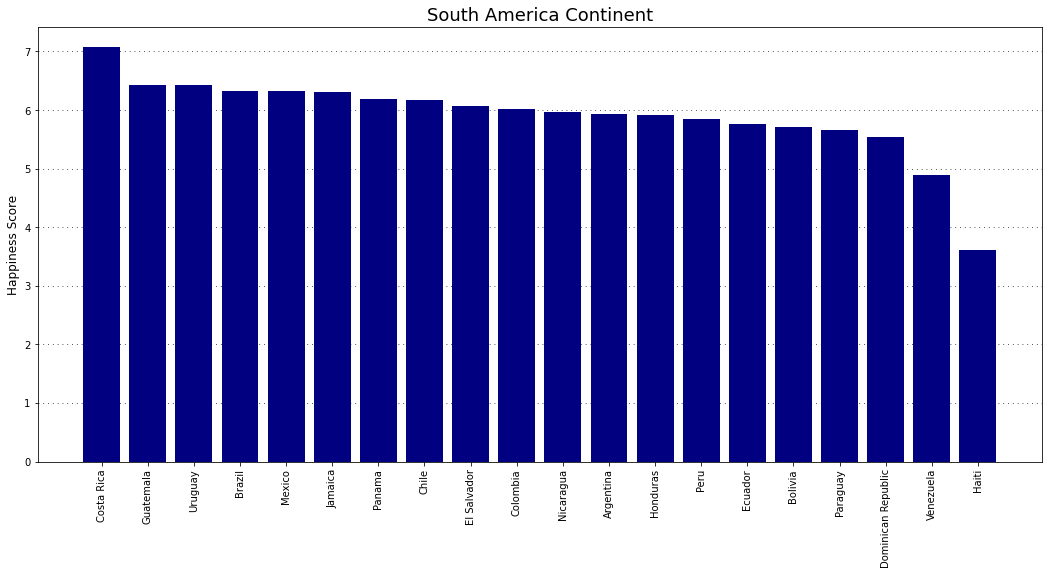

In [43]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.grid(color='black', linestyle='--', axis='y',dashes=(1,5))
plt.bar(South_America["Country"], South_America['Ladder_Score'], color='navy', zorder=3)
plt.ylabel("Happiness Score").set_fontsize('12')
plt.title("South America Continent").set_fontsize('18')
#plt.savefig('SA_continent.png') 

North America:

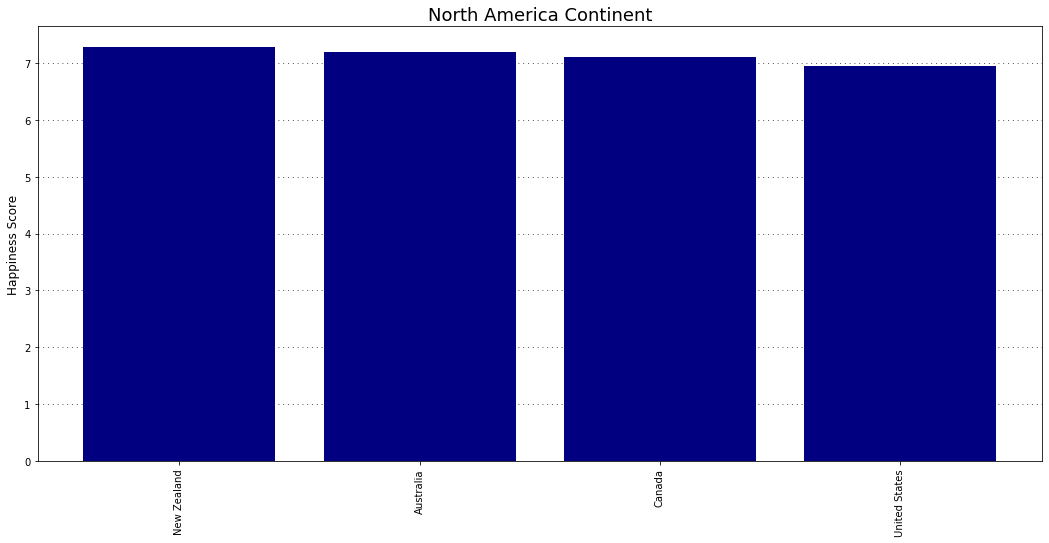

In [44]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.grid(color='black', linestyle='--', axis='y',dashes=(1,5))
plt.bar(North_America["Country"], North_America['Ladder_Score'], color='navy', zorder=3)
plt.ylabel("Happiness Score").set_fontsize('12')
plt.title("North America Continent").set_fontsize('18')
#plt.savefig('NA_continent.png') 

Analysing the average values of the Happiness Index. We will add a few countries to see how the average data 

Text(7.842, -0.026, 'Finland')

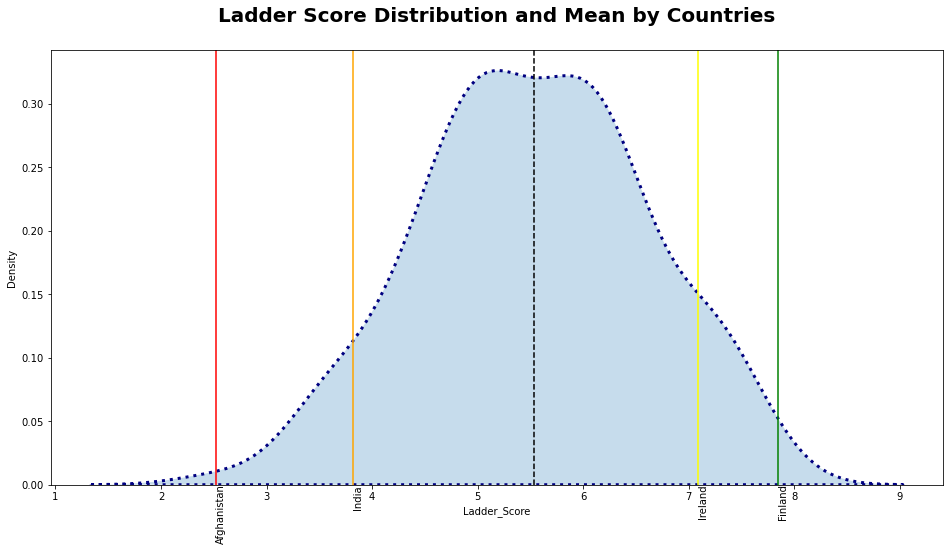

In [45]:
fig=plt.figure(figsize=(16,8))
plt.title("Ladder Score Distribution and Mean by Countries\n", weight='bold', size=20)
sns.kdeplot(worldHappiness2021['Ladder_Score'], fill=True, shade=True, edgecolor='navy', linewidth=3, ls=':')
plt.axvline(worldHappiness2021['Ladder_Score'].mean(), color='black',ls='--')
plt.axvline(worldHappiness2021[worldHappiness2021['Country']=='Afghanistan']['Ladder_Score'].mean(), color='red')
plt.text(x=worldHappiness2021[worldHappiness2021['Country']=='Afghanistan']['Ladder_Score'].mean(), y=-0.045, s='Afghanistan', rotation=90)
plt.axvline(worldHappiness2021[worldHappiness2021['Country']=='India']['Ladder_Score'].mean(), color='orange')
plt.text(x=worldHappiness2021[worldHappiness2021['Country']=='India']['Ladder_Score'].mean(), y=-0.018, s='India', rotation=90)
plt.axvline(worldHappiness2021[worldHappiness2021['Country']=='Ireland']['Ladder_Score'].mean(), color='yellow')
plt.text(x=worldHappiness2021[worldHappiness2021['Country']=='Ireland']['Ladder_Score'].mean(), y=-0.025, s='Ireland', rotation=90)
plt.axvline(worldHappiness2021[worldHappiness2021['Country']=='Finland']['Ladder_Score'].mean(), color='green')
plt.text(x=worldHappiness2021[worldHappiness2021['Country']=='Finland']['Ladder_Score'].mean(), y=-0.026, s='Finland', rotation=90)
#plt.savefig('LadderScoreDistributionAndMeanByCountries.png') 

Here, the Red line Indicates the "unhappiest" country Afghanistan, followed by the Orange line that indicates the Ladder score for India. The Black dotted line is the mean of the Ladder Score for all countries. The next line, denotes Ireland, which is represented by the color yellow. Lastly, the "Happiest" country Finland is represented as a green vertical line <br>
Next, let us see how the different features affect the ladder score for the Happiness of a country

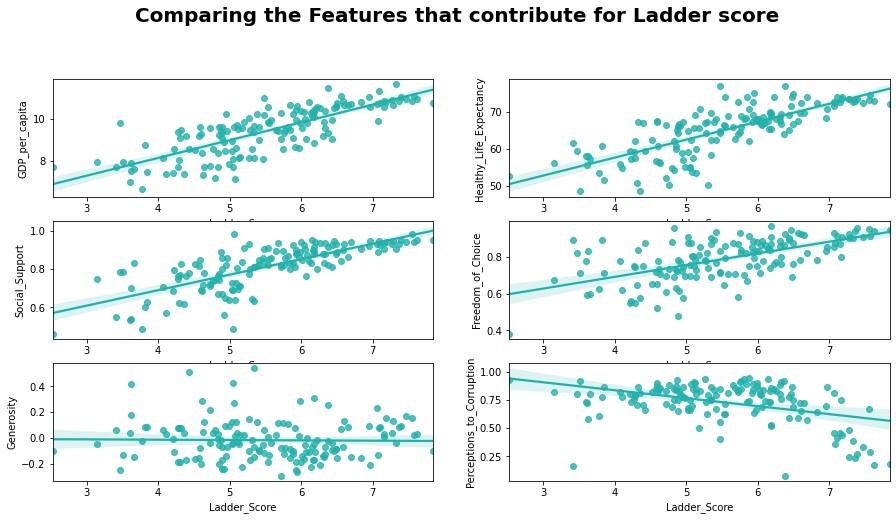

In [46]:
plot = worldHappiness2021.drop(columns='Dystopia_Residual')
cols = plot.corr()['Ladder_Score'].sort_values(ascending=False)
fig = plt.figure(figsize=(15,10))
plt.suptitle("Comparing the Features that contribute for Ladder score", weight='bold', size=20)
j = 0
for i in cols.index[1:]:
    ax = plt.subplot(421+j)
    ax = sns.regplot(data=worldHappiness2021, x='Ladder_Score',y=i, color='lightseagreen')
    j = j+1   
    
#plt.savefig('Comparing_Features.png') 

Visualizing the Top and Bottom Five countries in the World Happiness Index

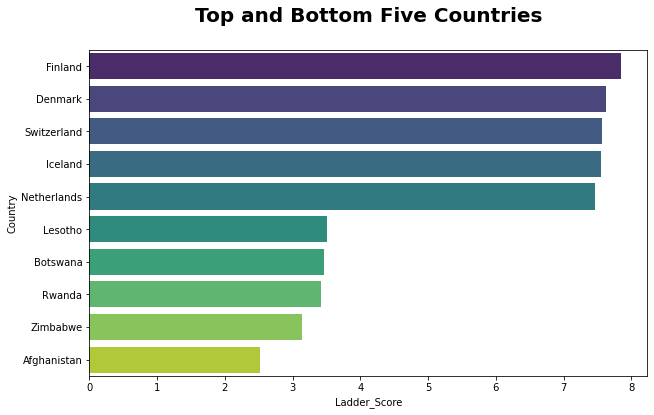

In [47]:
plt.figure(figsize=(10,6))
plt.title("Top and Bottom Five Countries\n",weight='bold', size=20)
sns.barplot(x="Ladder_Score",y="Country", data=TopAndBottomFive, palette="viridis")
plt.show()
#plt.savefig('TopAndBottom5.png') 

### For Dataset 2

Let's analyse th growth of Ireland's Happiness Index over the past 15 years, from 2006 to 2020

In [48]:
Ireland = worldHappiness_df[worldHappiness_df['Country name']=='Ireland']

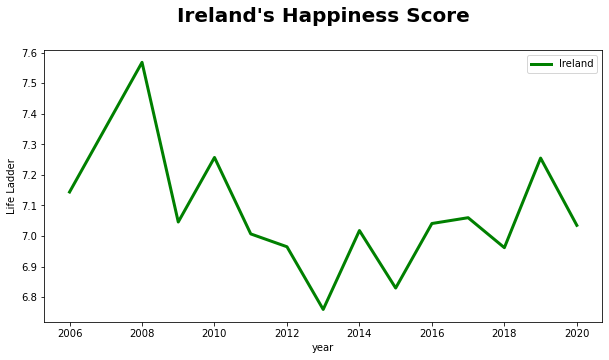

In [49]:
plt.figure(figsize=(10,5))
plt.title("Ireland's Happiness Score\n",weight='bold', size=20)
sns.lineplot(x=Ireland['year'], y=Ireland['Life Ladder'], linewidth="3", color='green')
plt.legend(labels=["Ireland"])
#plt.savefig('Ireland_HS.png') 

In [50]:
Bulgaria = worldHappiness_df[worldHappiness_df['Country name']=='Bulgaria']

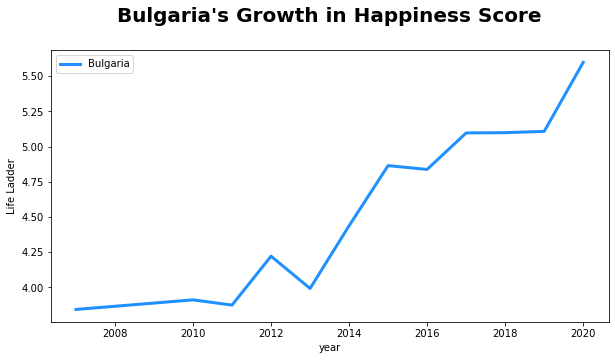

In [51]:
plt.figure(figsize=(10,5))
plt.title("Bulgaria's Growth in Happiness Score\n",weight='bold', size=20)
sns.lineplot(x=Bulgaria['year'], y=Bulgaria['Life Ladder'], linewidth="3", color='dodgerblue')
plt.legend(labels=["Bulgaria"])
#plt.savefig('Bulgaria_HS.png') 

Bulgaria's Ladder Score has grown since 2007 by an astonishing 1.5 points in 2020! <br>
Next let us also analyse the Happiest country in 2021, that is Finland. And also anlayse the unhappiest country in 2021, that is Afghanistan

In [52]:
Finland = worldHappiness_df[worldHappiness_df['Country name']=='Finland']

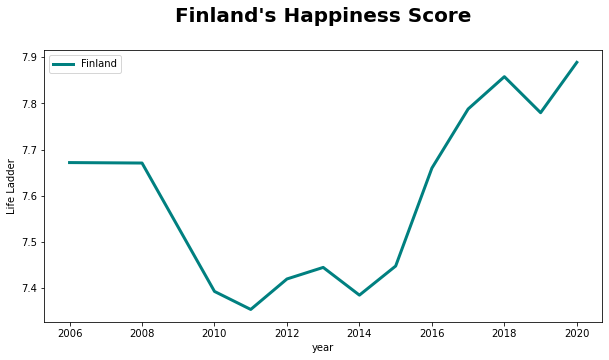

In [53]:
plt.figure(figsize=(10,5))
plt.title("Finland's Happiness Score\n",weight='bold', size=20)
sns.lineplot(x=Finland['year'], y=Finland['Life Ladder'], linewidth="3", color='teal')
plt.legend(labels=["Finland"])
#plt.savefig('Finland_HS.png') 

In [54]:
Afghanistan = worldHappiness_df[worldHappiness_df['Country name']=='Afghanistan']

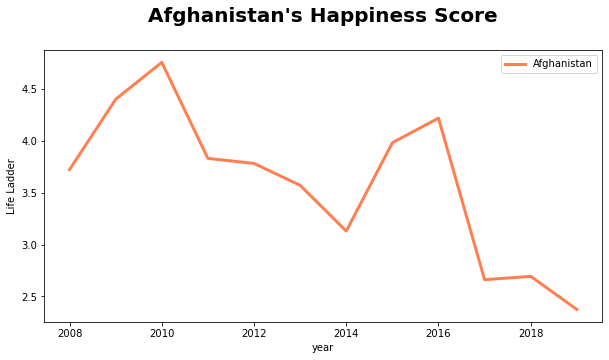

In [55]:
plt.figure(figsize=(10,5))
plt.title("Afghanistan's Happiness Score\n",weight='bold', size=20)
sns.lineplot(x=Afghanistan['year'], y=Afghanistan['Life Ladder'], linewidth="3", color='coral')
plt.legend(labels=["Afghanistan"])
#plt.savefig('Afghanistan_HS.png') 

Top five countries from 2005 to 2020, based on the ladder score

In [56]:
One = worldHappiness_df[worldHappiness_df['Country name']=='Finland']
Two = worldHappiness_df[worldHappiness_df['Country name']=='Denmark']
Three = worldHappiness_df[worldHappiness_df['Country name']=='Switzerland']
Four = worldHappiness_df[worldHappiness_df['Country name']=='Iceland']
Five = worldHappiness_df[worldHappiness_df['Country name']=='Netherlands']

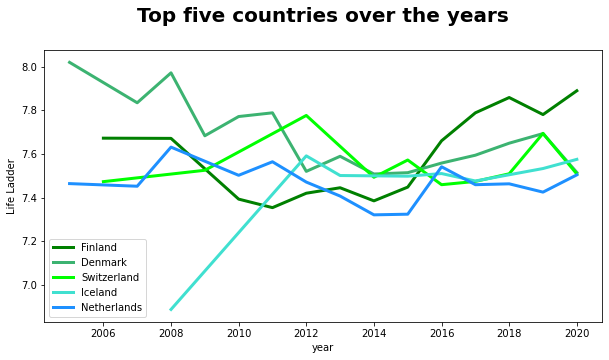

In [57]:
plt.figure(figsize=(10,5))
plt.title("Top five countries over the years\n",weight='bold', size=20)
sns.lineplot(x=One['year'], y=One['Life Ladder'], linewidth="3", color='green')
sns.lineplot(x=Two['year'], y=Two['Life Ladder'], linewidth="3", color='mediumseagreen')
sns.lineplot(x=Three['year'], y=Three['Life Ladder'], linewidth="3", color='lime')
sns.lineplot(x=Four['year'], y=Four['Life Ladder'], linewidth="3", color='turquoise')
sns.lineplot(x=Five['year'], y=Five['Life Ladder'], linewidth="3", color='dodgerblue')
plt.legend(labels=["Finland","Denmark","Switzerland","Iceland","Netherlands"])
#plt.savefig('Top5_HS.png') 

In [58]:
One = worldHappiness_df[worldHappiness_df['Country name']=='Lesotho']
Two = worldHappiness_df[worldHappiness_df['Country name']=='Botswana']
Three = worldHappiness_df[worldHappiness_df['Country name']=='Rwanda']
Four = worldHappiness_df[worldHappiness_df['Country name']=='Zimbabwe']
Five = worldHappiness_df[worldHappiness_df['Country name']=='Afghanistan']

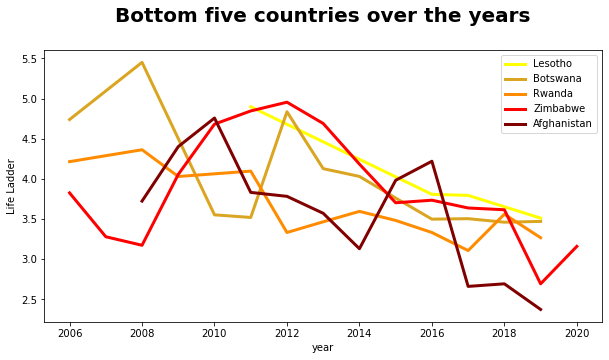

In [59]:
plt.figure(figsize=(10,5))
plt.title("Bottom five countries over the years\n",weight='bold', size=20)
sns.lineplot(x=One['year'], y=One['Life Ladder'], linewidth="3", color='yellow')
sns.lineplot(x=Two['year'], y=Two['Life Ladder'], linewidth="3", color='goldenrod')
sns.lineplot(x=Three['year'], y=Three['Life Ladder'], linewidth="3", color='darkorange')
sns.lineplot(x=Four['year'], y=Four['Life Ladder'], linewidth="3", color='red')
sns.lineplot(x=Five['year'], y=Five['Life Ladder'], linewidth="3", color='maroon')
plt.legend(labels=["Lesotho","Botswana","Rwanda","Zimbabwe","Afghanistan"])
#plt.savefig('Bottom5_HS.png') 

## Conclusion

Text(0.4, 0.2, 'North America')

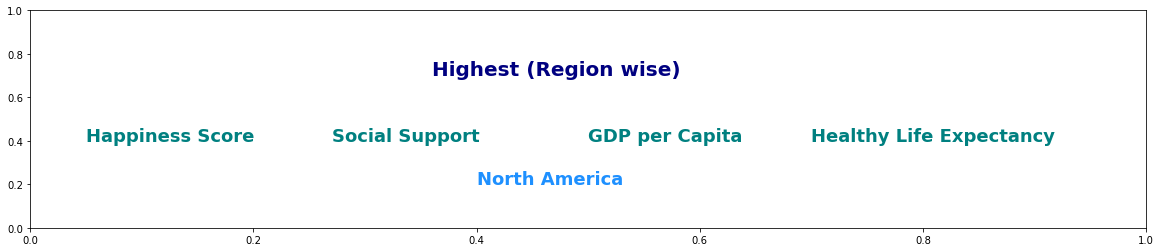

In [60]:
fig=plt.figure(figsize=(20,4))
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])
ax0.text(0.36,0.7,'Highest (Region wise)',fontweight='bold',fontsize=20,color='navy')

ax0.text(0.05,0.4,'Happiness Score',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.27,0.4,'Social Support',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.5,0.4,'GDP per Capita',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.70,0.4,'Healthy Life Expectancy',fontweight='bold',fontsize=18,color='teal')

ax0.text(0.4,0.2,'North America',fontweight='bold',fontsize=18,color='dodgerblue')

# The dataset was grouped by regions and the mean score of that region
# was divided by no of countries in that region for optimum results

Text(0.45, 0.2, 'Africa')

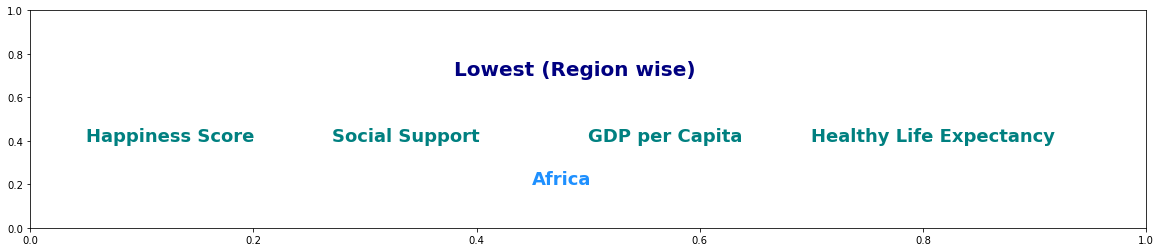

In [61]:
fig=plt.figure(figsize=(20,4))
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])
ax0.text(0.38,0.7,'Lowest (Region wise)',fontweight='bold',fontsize=20,color='navy')

ax0.text(0.05,0.4,'Happiness Score',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.27,0.4,'Social Support',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.5,0.4,'GDP per Capita',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.70,0.4,'Healthy Life Expectancy',fontweight='bold',fontsize=18,color='teal')

ax0.text(0.45,0.2,'Africa',fontweight='bold',fontsize=18,color='dodgerblue')

# The dataset was grouped by regions and the mean score of that region
# was divided by no of countries in that region for optimum results

Text(0.76, 0.2, 'New Zealand')

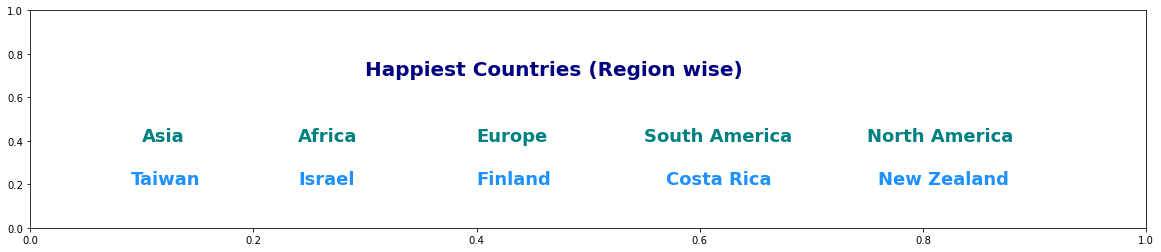

In [62]:
fig=plt.figure(figsize=(20,4))
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])
ax0.text(0.3,0.7,'Happiest Countries (Region wise)',fontweight='bold',fontsize=20,color='Navy')

ax0.text(0.1,0.4,'Asia',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.09,0.2,'Taiwan',fontweight='bold',fontsize=18,color='dodgerblue')

ax0.text(0.24,0.4,'Africa',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.24,0.2,'Israel',fontweight='bold',fontsize=18,color='dodgerblue')

ax0.text(0.4,0.4,'Europe',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.4,0.2,'Finland',fontweight='bold',fontsize=18,color='dodgerblue')

ax0.text(0.55,0.4,'South America',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.57,0.2,'Costa Rica',fontweight='bold',fontsize=18,color='dodgerblue')

ax0.text(0.75,0.4,'North America',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.76,0.2,'New Zealand',fontweight='bold',fontsize=18,color='dodgerblue')

Text(0.75, 0.2, 'United States')

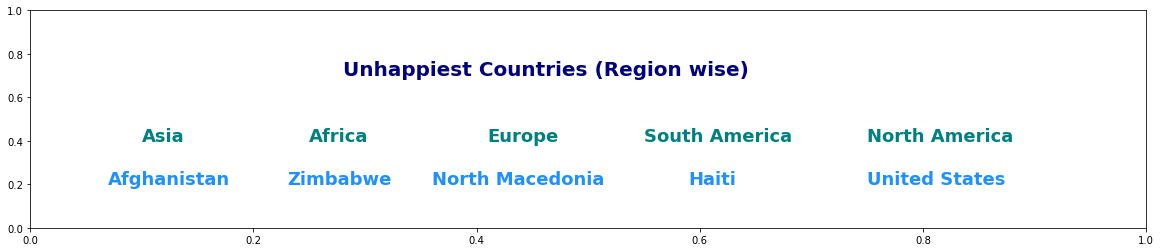

In [63]:
fig=plt.figure(figsize=(20,4))
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])
ax0.text(0.28,0.7,'Unhappiest Countries (Region wise)',fontweight='bold',fontsize=20,color='Navy')

ax0.text(0.1,0.4,'Asia',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.07,0.2,'Afghanistan',fontweight='bold',fontsize=18,color='dodgerblue')

ax0.text(0.25,0.4,'Africa',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.23,0.2,'Zimbabwe',fontweight='bold',fontsize=18,color='dodgerblue')

ax0.text(0.41,0.4,'Europe',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.36,0.2,'North Macedonia',fontweight='bold',fontsize=18,color='dodgerblue')

ax0.text(0.55,0.4,'South America',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.59,0.2,'Haiti',fontweight='bold',fontsize=18,color='dodgerblue')

ax0.text(0.75,0.4,'North America',fontweight='bold',fontsize=18,color='teal')
ax0.text(0.75,0.2,'United States',fontweight='bold',fontsize=18,color='dodgerblue')

We see that there are many clear distinctions between happy and unhappy countries. Generally, happier countries tend to be wealthier, be less corrupt, be more free, have healthier life expectancy and have a lot of social support <br>
Of course, a lot of these findings may come as a result of being wealthy, rather than be a cause of happiness in and of themselves. We also know that, generally, the happy stay happy, and the unhappy are getting unhappier.<br>
However, as we have seen with Bulgaria, this does not have to be the case. Bulgaria improved by over 1.5 points between 2007 and 2020 - the most of any country. So there is hope that unhappy countries can break their own historic trends. <br>
To wrap things up, this was an exploratory data analysis into why some countries are considered “happier” than others. We found that GDP per capita is the most important factor, which makes sense because money allows countries to afford luxuries along with basic resources. Despite all this, however, there are many more things that affect a country’s happiness. <br>

## Machine Learning Possibility?


To make a model sophisticated enough to measure the many more factors that affect a country's happiness, we can add machines learning to improve the data collection, analysis, grouping and visualization.<br>
The model can predict the Happiness Score of a counry based on it's historic trends and other factors such as GDP, Life expectancy, Social Support, etc. The output can be classification based to begin with, for example, the model could classify Ireland as a Happy country and Haiti as an Unhappy country. Once we have a basic machine learning model implemented, we can add regression/ back propagation to find specific values for happiness score or other factors. <br>
A good way to analyse the success of this type of machine learning network will be to check the answer to the question: "Is (Country Name), a Happy Country?" The answer would be a simple YES or NO. <br>

In [64]:
##### YOU HAVE REACHED THE END OF THE REPORT #####
############# THANK YOU FOR READING ##############
#### BY SARTHAK KAPOOR ### YEAR : AUGUST 2022 ####